In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)

In [3]:
data = pd.read_csv('marketing_data.csv')
data.head()
data2=data.copy()

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
data.rename({' Income ' : 'Income'}, axis = 1, inplace = True)

data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype(float)

<ipython-input-5-2c850e89d40b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$', '')


In [6]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [7]:
data.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
data['Income'] = data['Income'].fillna(data['Income'].mean())


In [9]:
data['Customer_Age_When_Enrolled'] = data['Dt_Customer'].dt.year - data['Year_Birth']
data[data['Customer_Age_When_Enrolled'] >= 80]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age_When_Enrolled
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,114
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,113


In [10]:
data['Total Spent'] = (data['MntFishProducts'] + data['MntWines'] + data['MntSweetProducts']
                       + data['MntFruits'] + data['MntMeatProducts'] + data['MntGoldProds'] )

In [11]:
data['Total Purchases'] = (data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumStorePurchases'] +
                            data['NumCatalogPurchases'])

In [12]:
data['Kids_Teen_at_home'] = data['Kidhome'] + data['Teenhome']
data = data.drop(['Kidhome', 'Teenhome'], axis = 1)

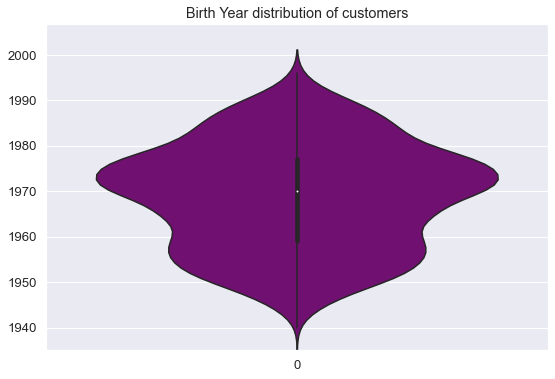

In [13]:
plt.figure(figsize= [9,6])
sns.violinplot(data = data['Year_Birth'], color = 'purple');
plt.ylim(1935);
plt.title("Birth Year distribution of customers");

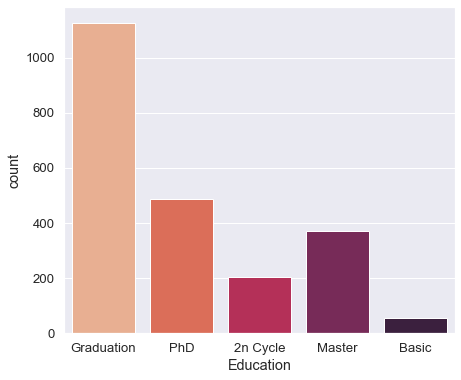

In [14]:
plt.figure(figsize = (7, 6));
sns.countplot(x = data['Education'], palette = 'rocket_r');

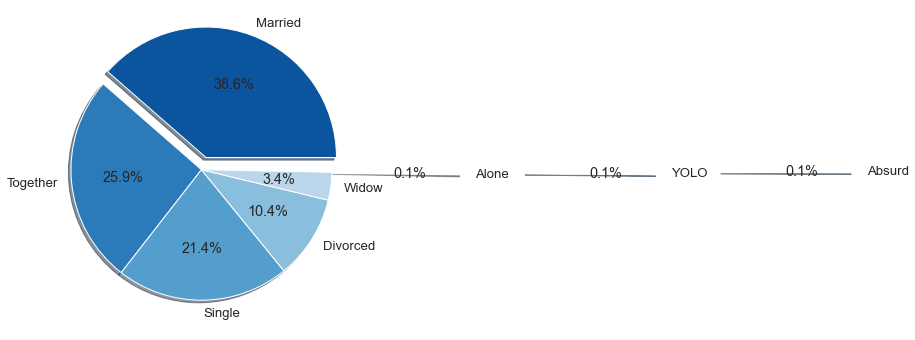

In [15]:
m = data['Marital_Status'].value_counts().to_frame('Count')

sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(m['Count'], labels = m.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), shadow = True, autopct = '%1.1f%%')
plt.show()

C:\Users\new\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


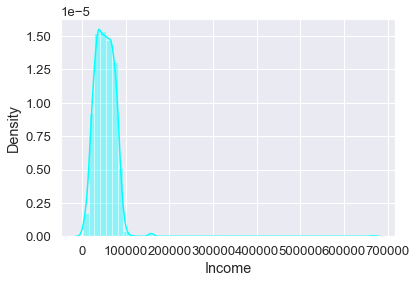

In [16]:
sns.distplot(data['Income'], color = 'aqua');

C:\Users\new\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


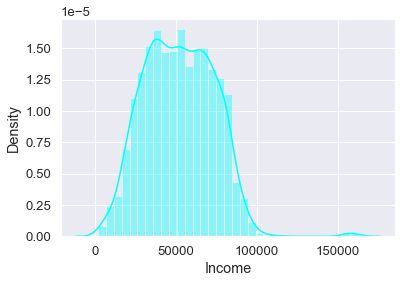

In [17]:
data = data[data['Income'] < 200000];
sns.distplot(data['Income'], color = 'aqua');

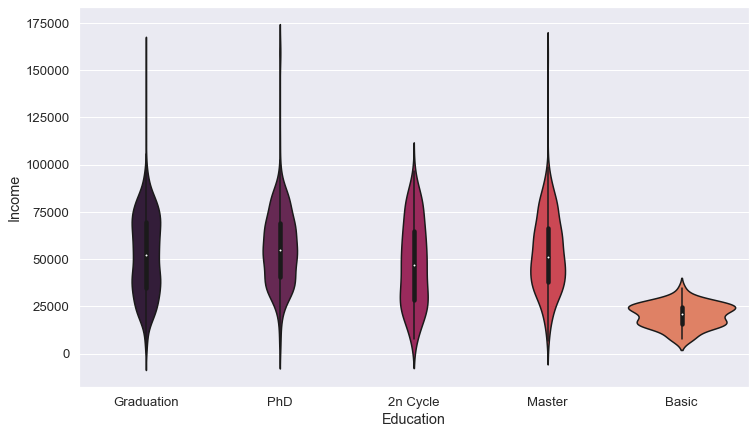

In [18]:
sns.set_palette('rocket');
plt.figure(figsize = (12, 7));
sns.violinplot(y = data['Income'], x = data['Education']);

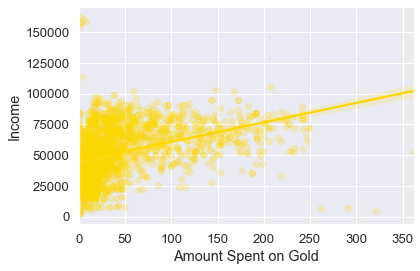

In [19]:
sns.regplot(x = data['MntGoldProds'], y = data['Income'], color = 'gold', scatter_kws={'alpha':0.2} );
plt.xlabel('Amount Spent on Gold');

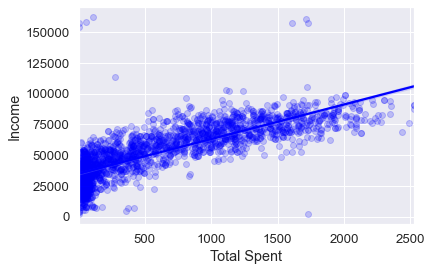

In [20]:
sns.regplot(x = data['Total Spent'], y = data['Income'], color = 'blue' ,scatter_kws={'alpha':0.2});


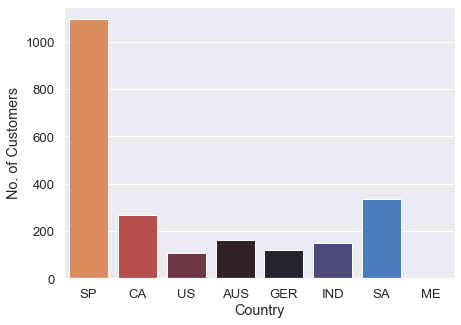

In [21]:
plt.figure(figsize = (7, 5))
sns.countplot(x = data['Country'], palette = 'icefire_r')
plt.ylabel('No. of Customers');

C:\Users\new\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


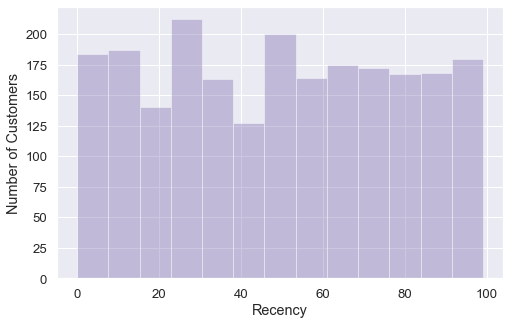

In [22]:
plt.figure(figsize = (8, 5))
plt.ylabel("Number of Customers")
sns.distplot(data['Recency'], color = 'm',kde=False);

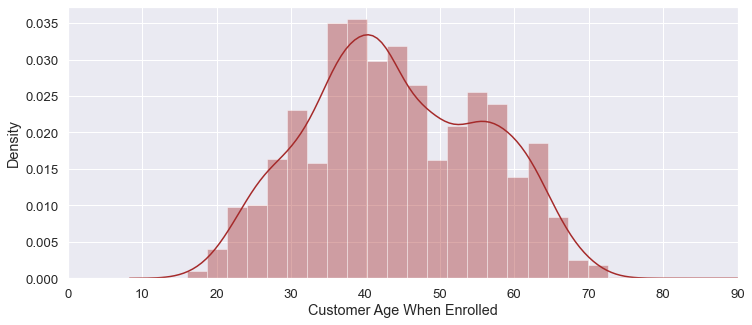

In [23]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Customer_Age_When_Enrolled'], color = 'brown')
plt.xlim(0,90)
plt.xlabel('Customer Age When Enrolled');

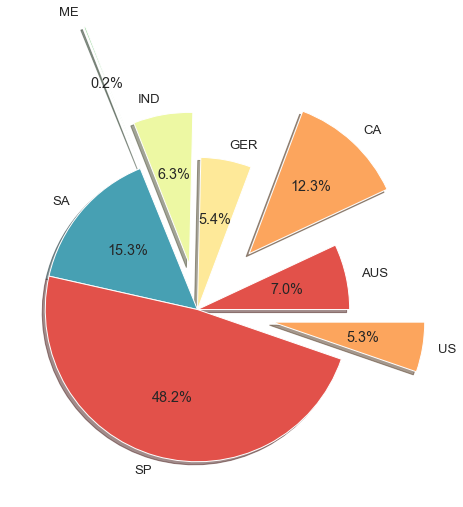

In [24]:
pm = data[['Total Purchases', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize = (7, 7))
plt.pie(pm['Total Purchases']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),
        shadow = True, autopct = '%1.1f%%')
plt.show();

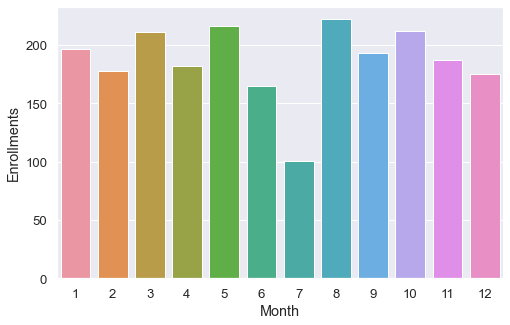

In [25]:
plt.figure(figsize = (8, 5))
sns.countplot(x = data['Dt_Customer'].dt.month)
plt.xlabel('Month')
plt.ylabel('Enrollments');

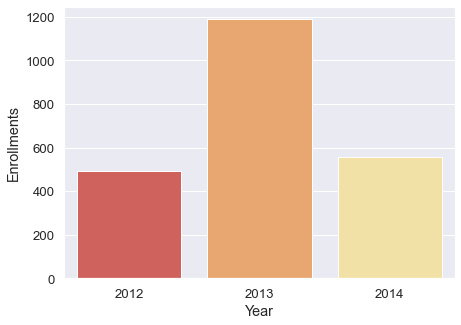

In [26]:
plt.figure(figsize = (7,5))

sns.countplot(x = data['Dt_Customer'].dt.year)
plt.xlabel('Year')
plt.ylabel('Enrollments');

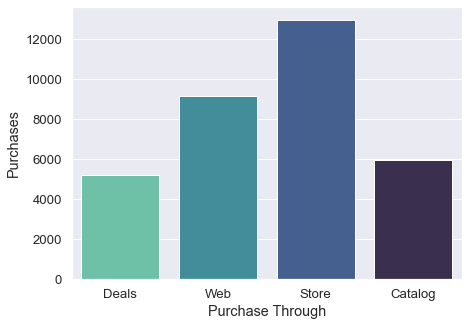

In [27]:
plt.figure(figsize = (7,5))
tp = data[['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].agg([sum])

sns.barplot(x = tp.T.index, y = tp.T['sum'], palette = 'mako_r')
plt.gca().set_xticklabels(['Deals', 'Web', 'Store', 'Catalog'])
plt.xlabel('Purchase Through')
plt.ylabel('Purchases')
plt.show()

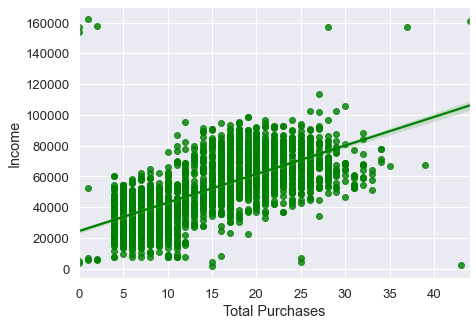

In [28]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['Total Purchases'], y = data['Income'], color = 'green');

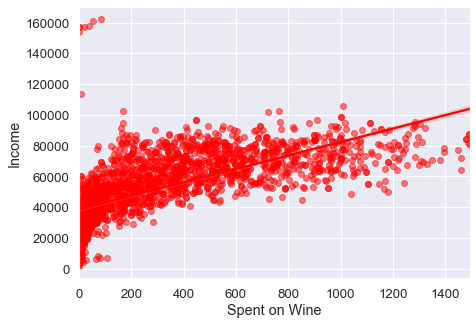

In [29]:
plt.figure(figsize = (7, 5))
sns.regplot(x = data['MntWines'], y = data['Income'], color = 'red',scatter_kws={'alpha':0.5})
plt.xlabel('Spent on Wine');

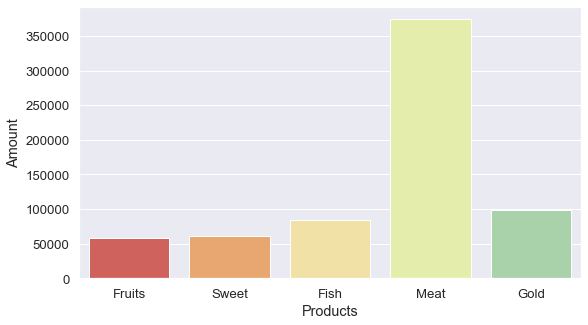

In [30]:
prod = data[['MntFruits', 'MntSweetProducts', 'MntFishProducts', 'MntMeatProducts', 'MntGoldProds']].agg([sum]).T
plt.figure(figsize = (9,5))

sns.barplot(x = prod.index, y = prod['sum'])
plt.gca().set_xticklabels(['Fruits', 'Sweet', 'Fish', 'Meat', 'Gold'])
plt.xlabel('Products')
plt.ylabel('Amount');

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
list=['Education','Marital_Status','Country']
data2=pd.get_dummies(data2,columns=list,prefix=list)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       2240 non-null   int64 
 1   Year_Birth               2240 non-null   int64 
 2    Income                  2216 non-null   object
 3   Kidhome                  2240 non-null   int64 
 4   Teenhome                 2240 non-null   int64 
 5   Dt_Customer              2240 non-null   object
 6   Recency                  2240 non-null   int64 
 7   MntWines                 2240 non-null   int64 
 8   MntFruits                2240 non-null   int64 
 9   MntMeatProducts          2240 non-null   int64 
 10  MntFishProducts          2240 non-null   int64 
 11  MntSweetProducts         2240 non-null   int64 
 12  MntGoldProds             2240 non-null   int64 
 13  NumDealsPurchases        2240 non-null   int64 
 14  NumWebPurchases          2240 non-null  

In [33]:
y = data2["Response"]
x = data2.drop(["Response","Recency","Complain","Teenhome"], axis = 1)

In [34]:
# data2.drop(["ID"], axis = 1, inplace=True)
x.drop(['ID', 'Year_Birth', ' Income ', 'Dt_Customer'], axis=1, inplace = True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Kidhome                  2240 non-null   int64
 1   MntWines                 2240 non-null   int64
 2   MntFruits                2240 non-null   int64
 3   MntMeatProducts          2240 non-null   int64
 4   MntFishProducts          2240 non-null   int64
 5   MntSweetProducts         2240 non-null   int64
 6   MntGoldProds             2240 non-null   int64
 7   NumDealsPurchases        2240 non-null   int64
 8   NumWebPurchases          2240 non-null   int64
 9   NumCatalogPurchases      2240 non-null   int64
 10  NumStorePurchases        2240 non-null   int64
 11  NumWebVisitsMonth        2240 non-null   int64
 12  AcceptedCmp3             2240 non-null   int64
 13  AcceptedCmp4             2240 non-null   int64
 14  AcceptedCmp5             2240 non-null   int64
 15  Acce

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12345)

In [36]:
print(x_train.shape,y_train.shape,x_test.shape,y_train.shape)

(1680, 38) (1680,) (560, 38) (1680,)


In [37]:
models=[]
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('DT',DecisionTreeClassifier(random_state=12345)))
models.append(('GB',GradientBoostingClassifier(random_state=12345)))
models.append(('NN',MLPClassifier(random_state=(12345))))
models.append(('SVM',SVC(random_state=(12345))))
models.append(('RF',RandomForestClassifier(random_state=(12345))))
models.append(('KN', KNeighborsClassifier()))
#valute
result=[]
name=[]

In [38]:
#we compare the models with each other
for name , model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test,predictions)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)

C:\Users\new\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: (0.839286)
DT: (0.816071)
GB: (0.853571)
NN: (0.853571)
SVM: (0.842857)
RF: (0.851786)
KN: (0.844643)
